# Lets Perform a Simple Linear Regression (Using One Feature)

# Diabetes dataset
**Ten** baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**
Number of Instances: 442
Number of Attributes: First 10 columns are numeric predictive values
Target: Column 11 is a quantitative measure of disease progression one year after baseline

## Attribute Information:  
- Age
- Sex
- Body mass index
- Average blood pressure      
- S1: blood serum measurement 1
- S2: blood serum measurement 2
- S3: blood serum measurement 3
- S4: blood serum measurement 4
- S5: blood serum measurement 5
- S6: blood serum measurement 6
- target: a quantitative measure of disease progression one year after baseline

## Note: 
Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)'

#Import Dataset

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset. This is Scikit-Learn dataset format.
diabetes = datasets.load_diabetes()



Automatically created module for IPython interactive environment


# Lets create a quick and dirty modeling 

# Check Dataset Type

In [ ]:
type(diabetes)

sklearn.utils.Bunch

# Convert Dataset to Panda DF

In [ ]:
import numpy as np
import pandas as pd
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])


# Look at Data

In [ ]:
display(diabetes_df[:10])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [ ]:

# For simplicity, lets select only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets (422 record for training and 20 for test)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets (422 record for training and 20 for test)
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


# Modeling

In [ ]:

# Create linear regression object
regr = linear_model.---()

# Train the model using the training sets
regr.---(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.----(diabetes_X_test)



# Lets look at under the hood

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R^2 Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
R^2 Variance score: 0.47


# Plot

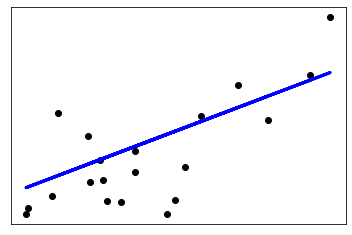

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Above way was very inefficient. Lets follow best practice and do proper ML

## Step 1: Select Exploratory Features

In [ ]:
# Use only one feature
diabetes_X = diabetes_df['age']
diabetes_X = np.array(diabetes_X.values).reshape(-1,1)

diabetes_y = diabetes_df['target']
diabetes_y = np.array(diabetes_y.values).reshape(-1,1)

#View it
print(type(diabetes_X))
print(diabetes_X.shape)


print(type(diabetes_y))
print(diabetes_y.shape)

<class 'numpy.ndarray'>
(442, 1)
<class 'numpy.ndarray'>
(442, 1)


## Step 2 Split data into Train/Test

In [ ]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split

# Create the train and test data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = ------(diabetes_X, diabetes_y, test_size=0.2)


print(diabetes_X_train[:5])
print(diabetes_X_test[:5])
print(diabetes_y_train[:5])
print(diabetes_y_test[:5])



[[ 0.08893144]
 [ 0.01264814]
 [ 0.0090156 ]
 [-0.00188202]
 [ 0.03081083]]
[[-0.06000263]
 [ 0.04534098]
 [ 0.07803383]
 [ 0.01991321]
 [ 0.06713621]]
[[109.]
 [198.]
 [292.]
 [ 90.]
 [310.]]
[[ 61.]
 [185.]
 [ 89.]
 [321.]
 [124.]]


In [ ]:
# Did we do proper split
print("Train dataset size")
print(diabetes_X_train.shape)
print(diabetes_y_train.shape)

print("Test dataset size")
print(diabetes_X_test.shape)
print(diabetes_y_test.shape)

Train dataset size
(353, 1)
(353, 1)
Test dataset size
(89, 1)
(89, 1)


# Create Linear Regression Model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Train The Model

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Look at Model Coefficient and Intercept

In [ ]:
print("coefficient is " , regr.coef_)
print("Intercept is", regr.intercept_)


coefficient is  [[334.45962981]]
Intercept is [153.42113173]


In [ ]:
print(diabetes_X_test.shape)
print(diabetes_y_test.shape)

(89, 1)
(89, 1)


# Make Prediction

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred[:5]

array([[167.37092276],
       [127.2779864 ],
       [129.70786133],
       [145.50204838],
       [166.1559853 ]])

# Look at Error

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))

print("Mean absolute error: %.2f"
      % mean_absolute_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('R^2 Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))



Mean squared error: 5332.70
Root Mean squared error: 73.03
Mean absolute error: 61.92
R^2 Variance score: -0.00


# Conclusion

1.   The model has fairly high error; something in the range of **5000**
2.    The model is **almost as bad as** when we assign average of the entire target variable to all.

**Can anyone says why our model is so bad?**

# Plot the Model

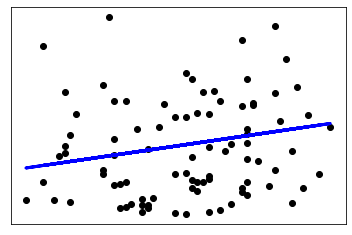

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Question: Run the entire code using both simple and proper ways. Compare the results. What is happening?

In [ ]:
random_state=1?